In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/yumi-ito/sample_data/master/subject_scores.csv'
df = pd.read_csv(url)
df.head()

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
0,49,49,54,54,60,48,56,56,62,52,55,41
1,57,60,48,51,64,60,61,64,67,55,58,54
2,65,68,50,51,54,44,55,59,66,53,61,52
3,55,57,49,51,61,55,58,61,66,53,57,50
4,43,41,45,46,46,33,45,45,56,43,45,31


In [3]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,57.578,59.628,52.577,53.584,60.6,51.601,58.561,60.63,65.574,54.576,59.64,49.588
std,8.32293,10.0724,6.19245,5.26466,8.36612,10.6771,7.03703,7.45726,4.31545,5.79584,6.77512,9.0544
min,30,26,33,36,34,16,36,37,52,35,37,23
25%,52,53,48.75,50,55,44,54,56,63,51,55,44
50%,58,60,52,54,61,52,59,61,66,55,60,49
75%,63,66,57,57,66,59,63,66,69,59,64,56
max,86,95,72,69,82,82,77,85,81,71,79,84


### データを散布図で概観

array([[<AxesSubplot:xlabel='国語', ylabel='国語'>,
        <AxesSubplot:xlabel='英語', ylabel='国語'>,
        <AxesSubplot:xlabel='数学', ylabel='国語'>,
        <AxesSubplot:xlabel='物理', ylabel='国語'>,
        <AxesSubplot:xlabel='化学', ylabel='国語'>,
        <AxesSubplot:xlabel='生物', ylabel='国語'>,
        <AxesSubplot:xlabel='地学', ylabel='国語'>,
        <AxesSubplot:xlabel='世界史', ylabel='国語'>,
        <AxesSubplot:xlabel='日本史', ylabel='国語'>,
        <AxesSubplot:xlabel='経済', ylabel='国語'>,
        <AxesSubplot:xlabel='地理', ylabel='国語'>,
        <AxesSubplot:xlabel='倫理', ylabel='国語'>],
       [<AxesSubplot:xlabel='国語', ylabel='英語'>,
        <AxesSubplot:xlabel='英語', ylabel='英語'>,
        <AxesSubplot:xlabel='数学', ylabel='英語'>,
        <AxesSubplot:xlabel='物理', ylabel='英語'>,
        <AxesSubplot:xlabel='化学', ylabel='英語'>,
        <AxesSubplot:xlabel='生物', ylabel='英語'>,
        <AxesSubplot:xlabel='地学', ylabel='英語'>,
        <AxesSubplot:xlabel='世界史', ylabel='英語'>,
        <AxesSubplot:xlabel='日本史', y

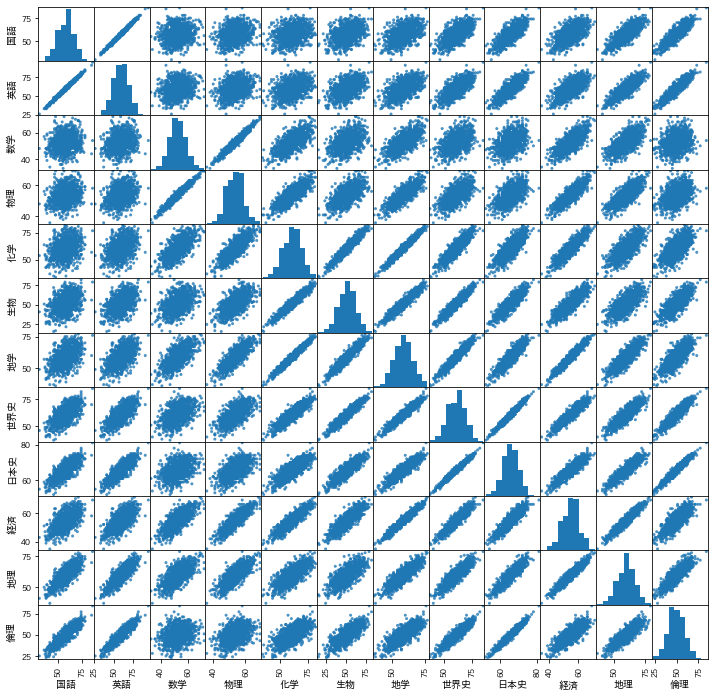

In [5]:
# 散布図行列を表示
pd.plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.8)

### データを標準化する

In [7]:
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df)

# 実際にデータを変換
z = sc.transform(df)

# print(z)
# print(z.shape)

### モデルを生成し、因子得点を算出する

In [ ]:
# sklearnのFactorAnalysis(因子分析)クラスをインポート
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components=3

# 因子分析の実行
fa = FA(n_components, max_iter=5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)

### 因子負荷量行列を取得する

In [10]:
# 変数Factor_loading_matrixに格納
Factor_loading_matrix = fa.components_.T

# データフレームに変換
mtrx = pd.DataFrame(Factor_loading_matrix, 
                    columns=["第1因子", "第2因子", "第3因子"], 
                    index=[df.columns])

mtrx

,第1因子,第2因子,第3因子
国語,0.742494,0.660333,0.106680
英語,0.809237,0.582365,0.071908
数学,0.555028,-0.485400,0.673965
物理,0.705315,-0.479077,0.519653
化学,0.854549,-0.512713,-0.075076
生物,0.878975,-0.358658,-0.312993
地学,0.940102,-0.338218,0.002551
世界史,0.982309,-0.088080,-0.160289
日本史,0.985873,0.082731,-0.129955
経済,0.961655,-0.178404,0.201633


### 因子を用いた散布図

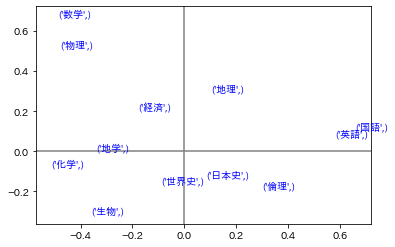

In [15]:
plt.scatter(mtrx.loc[:,"第2因子"], mtrx.loc[:,"第3因子"], c='b', marker="None")
labels = mtrx.index
for label, x, y in zip(labels, mtrx.loc[:,"第2因子"], mtrx.loc[:,"第3因子"]):
    plt.annotate(label, xy=(x, y), c="b")
# xy軸
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
 